## Importing data

In [7]:
import os
import sys

import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

In [8]:
#Importing elections participation data
gdf = gpd.read_file("../../data/external/gobernance/nuevoleon/secciones_nl2021.gpkg")

In [9]:
gdf

,ID,ENTIDAD,DISTRITO_L,MUNICIPIO,SECCION,TIPO,CONTROL,DISTRITO_F,Geometry1_,DISTANCIA,parti_ayun,parti_dip,parti_gob,ayun_votos,dip_votos,gob_votos,listanominal,geometry
0,1,19,20,1,1,3,2118,7,1=X+gp,NaN,0.806,0.807,0.806,833.0,834.0,833.0,1033.0,"MULTIPOLYGON (((-100.39539 25.99473, -100.3937..."
1,2,19,20,1,2,3,253,7,1=X+gp,NaN,0.801,0.779,0.799,1185.0,1152.0,1181.0,1479.0,"MULTIPOLYGON (((-100.38919 25.99218, -100.3887..."
2,3,19,21,2,3,3,42,7,1=X+i-,NaN,0.726,0.726,0.726,632.0,632.0,632.0,870.0,"MULTIPOLYGON (((-99.59307 26.35182, -99.59244 ..."
3,4,19,21,2,4,3,447,7,1=X+,NaN,0.683,0.683,0.685,317.0,317.0,318.0,464.0,"MULTIPOLYGON (((-99.47286 26.45188, -99.47270 ..."
4,5,19,21,2,5,3,446,7,1=X+i,NaN,0.712,0.714,0.721,426.0,427.0,431.0,598.0,"MULTIPOLYGON (((-99.44340 26.40712, -99.44169 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2813,2814,19,15,26,2902,2,3540,8,1=X+h.p,5.0,0.575,0.574,0.576,1118.0,1117.0,1120.0,1945.0,"MULTIPOLYGON (((-100.20868 25.69782, -100.2086..."
2814,2815,19,15,26,2903,2,3544,8,1=X+h.p,5.0,0.562,0.560,0.563,1001.0,998.0,1003.0,1782.0,"MULTIPOLYGON (((-100.20779 25.70283, -100.2077..."
2815,2816,19,23,9,2904,2,3538,12,1=X+hb,NaN,0.512,0.501,0.512,1546.0,1514.0,1548.0,3021.0,"MULTIPOLYGON (((-99.97262 25.58113, -99.97328 ..."
2816,2817,19,23,9,2905,2,3541,12,1=X+hb>,NaN,0.524,0.523,0.529,1337.0,1334.0,1349.0,2551.0,"MULTIPOLYGON (((-99.97461 25.58142, -99.97518 ..."


## Data treatment

### Creating parti_max

In [10]:
#There is data for three types of elections. Ayuntamientos (ayun), diputados(dip), and governor (gov)
gdf[["parti_ayun","parti_dip","parti_gob"]]

,parti_ayun,parti_dip,parti_gob
0,0.806,0.807,0.806
1,0.801,0.779,0.799
2,0.726,0.726,0.726
3,0.683,0.683,0.685
4,0.712,0.714,0.721
...,...,...,...
2813,0.575,0.574,0.576
2814,0.562,0.560,0.563
2815,0.512,0.501,0.512
2816,0.524,0.523,0.529


In [11]:
#Finding the highest participation percentaje. axis=1 indicates to find the max per row, not column.
gdf["parti_max"] = gdf[["parti_ayun","parti_dip","parti_gob"]].max(axis=1)

### Remove higher than 1 values

In [12]:
#idx gets all higher than 1 values
idx = gdf["parti_max"] > 1
gdf.loc[idx]

,ID,ENTIDAD,DISTRITO_L,MUNICIPIO,SECCION,TIPO,CONTROL,DISTRITO_F,Geometry1_,DISTANCIA,parti_ayun,parti_dip,parti_gob,ayun_votos,dip_votos,gob_votos,listanominal,geometry,parti_max
377,378,19,18,19,408,2,1797,1,1=X+HD,NaN,0.811,1.002,0.990,1190.0,1470.0,1453.0,1467.0,"MULTIPOLYGON (((-100.37128 25.65149, -100.3712...",1.002
516,517,19,12,26,561,2,1199,11,1=X+h](,5.0,0.678,2.089,1.330,421.0,1297.0,826.0,621.0,"MULTIPOLYGON (((-100.24938 25.67981, -100.2483...",2.089
814,815,19,24,34,869,2,519,9,1=X+nf,NaN,0.525,1.015,0.755,1010.0,1952.0,1452.0,1923.0,"MULTIPOLYGON (((-99.58124 24.87453, -99.57969 ...",1.015
885,886,19,24,39,945,2,476,9,1=X+L6q,NaN,0.648,2.042,1.309,464.0,1462.0,937.0,716.0,"MULTIPOLYGON (((-99.83816 25.19031, -99.83724 ...",2.042
954,955,19,4,40,1016,2,1030,6,1=X+H9p,5.0,1.063,4.147,2.343,304.0,1186.0,670.0,286.0,"MULTIPOLYGON (((-100.35680 25.70838, -100.3563...",4.147
1098,1099,19,6,40,1161,2,3532,10,"1=X+h,k",5.0,1.059,6.691,3.420,199.0,1258.0,643.0,188.0,"MULTIPOLYGON (((-100.31687 25.68605, -100.3159...",6.691
1316,1317,19,8,40,1388,2,1842,10,1=X+h[,10.0,0.778,1.169,0.936,1508.0,2267.0,1814.0,1939.0,"MULTIPOLYGON (((-100.27152 25.62105, -100.2711...",1.169
1567,1568,19,11,40,1639,2,2206,6,"1=X+h,",5.0,0.651,1.191,1.171,194.0,355.0,349.0,298.0,"MULTIPOLYGON (((-100.31692 25.72269, -100.3138...",1.191
2007,2008,19,26,49,2087,2,1777,9,1=X+hj,NaN,0.685,1.147,0.935,1038.0,1738.0,1417.0,1515.0,"MULTIPOLYGON (((-100.15554 25.42622, -100.1553...",1.147
2632,2633,19,20,40,2717,2,2837,7,1=X+H5,15.0,1.244,3.372,1.994,388.0,1052.0,622.0,312.0,"MULTIPOLYGON (((-100.42209 25.77137, -100.4191...",3.372


In [13]:
#Changing all values>1 to 1
gdf.loc[idx,"parti_max"] = 1
idx = gdf["parti_max"] > 1
gdf.loc[idx]

,ID,ENTIDAD,DISTRITO_L,MUNICIPIO,SECCION,TIPO,CONTROL,DISTRITO_F,Geometry1_,DISTANCIA,parti_ayun,parti_dip,parti_gob,ayun_votos,dip_votos,gob_votos,listanominal,geometry,parti_max


## Upload data to database

In [14]:
aup.gdf_to_db_slow(gdf,"participacion_nl", 'governance', if_exists='replace')

# LO SIGUIENTE ESTÁ EN PROCESO

## Linking Data -to-> nodes -to-> hex

### Downloading previous data from database and downloading nodes and edges

In [16]:
#Previous data
nldata = aup.gdf_from_db("participacion_nl", 'governance')
nldata.head(1)

,ID,ENTIDAD,DISTRITO_L,MUNICIPIO,SECCION,TIPO,CONTROL,DISTRITO_F,Geometry1_,DISTANCIA,parti_ayun,parti_dip,parti_gob,ayun_votos,dip_votos,gob_votos,listanominal,geometry,parti_max
0,1,19,20,1,1,3,2118,7,1=X+gp,NaN,0.806,0.807,0.806,833.0,834.0,833.0,1033.0,"MULTIPOLYGON (((-100.39539 25.99473, -100.3937...",0.807


In [17]:
#Download nodes and edges [Función en aup>Data]
#gdf_from_db(name[#de donde busca nodes y edges], schema[#ubicación de edges y nodes]):
G,nodes,edges = aup.graph_from_hippo(nldata, 'osmnx')

2022-12-09 00:51:38 Created graph from node/edge GeoDataFrames


In [18]:
nodes.head(1)

,x,y,street_count,geometry
osmid,,,,
269701904,-100.25117,25.731077,3,POINT (-100.25117 25.73108)


In [19]:
edges.head(1)

,,,osmid,oneway,lanes,name,highway,maxspeed,length,geometry,bridge,ref,junction,tunnel,access,width,service
u,v,key,,,,,,,,,,,,,,,
1683282786,4790770533,0,156013159,False,None,None,service,None,18.225,"LINESTRING (-100.42206 25.65807, -100.42224 25...",None,None,None,None,None,None,None


### Participation to nodes

In [20]:
#Function in aup>analysis
#socio_polygon_to_points(nodes,gdf_socio[#info que queremos de data],column_start=0 [#4 porque ahí comienza la info que queremos],
#column_end=-1,cve_column="CVEGEO" [#Normalmente es CVEGEO, pero aquí son las secciones],avg_column=None[#datos]):
nl_nodes = aup.socio_polygon_to_points(nodes,nldata[["SECCION","geometry","parti_max"]],column_start=2,column_end=-1,cve_column="SECCION",avg_column=["parti_max"])

In [22]:
nl_nodes.head(2)

,x,y,street_count,geometry,SECCION,parti_max
osmid,,,,,,
269701904,-100.251170,25.731077,3,POINT (-100.25117 25.73108),1906,0.559
269701905,-100.255069,25.728568,3,POINT (-100.25507 25.72857),1906,0.559


<AxesSubplot:>

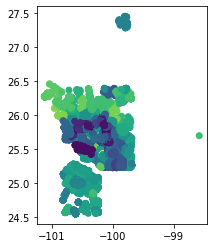

In [23]:
nl_nodes.plot("parti_max")

In [24]:
#Add weight=1 to all items to specify (later) that they all matter the same
nl_nodes["weight"] = 1

### Linking participation data to Guadalajara hex

In [25]:
#Downloading hex from database
hex8_mty = gpd.read_file("../../data/external/gobernance/nuevoleon/hex8_mty.gpkg")  

<AxesSubplot:>

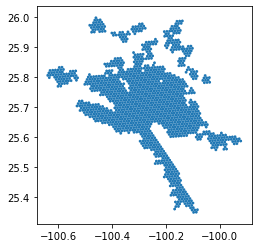

In [26]:
hex8_mty.plot()

In [28]:
#Linking participation data to hex.
#Function in aup>analysys
#socio_points_to_polygon(gdf_polygon,gdf_socio,cve_column[#La que tenga el ID del polígono],string_columns,
#wgt_dict=None[#Diccionario con dato:peso],avg_column=None[#datos]):
hex8_partimty = aup.socio_points_to_polygon(hex8_mty,nl_nodes,cve_column="hex_id_8",string_columns=["SECCION"],wgt_dict={"parti_max":"weight"},avg_column=["parti_max"])
hex8_partimty.head(1)

,x,y,street_count,parti_max,weight,hex_id_8
0,-21152.347656,5429.062988,646.0,0.58464,211.0,8848a20e57fffff


In [29]:
#keeping just id and parti_max
hex8_partimty = hex8_partimty[["hex_id_8","parti_max"]].copy()
hex8_partimty.head(1)

,hex_id_8,parti_max
0,8848a20e57fffff,0.58464


### Adding city and geometry

In [30]:
#Original hex8 data
hex8_mty.head(1)

,hex_id_8,max_escuelas,max_preescolar,max_primaria,max_secundaria,max_servicios comunitarios,max_salud,max_guarderías,max_asistencia social,max_comercio,...,pobtot,pobfem,pobmas,pob_0a14,pob_15a24,pob_25a59,p_60ymas,dens_pobha,city,geometry
0,8848a23881fffff,24.510757,24.460722,21.807982,9.385404,44.928272,22.735261,44.928272,12.703557,46.199314,...,255.11478,126.7705,123.34427,65.098359,43.606558,109.950839,31.459015,2.970079,Monterrey,"POLYGON ((-100.38026 25.93877, -100.38069 25.9..."


In [31]:
#Keeping just the id, city and geometry
hex8_mty = hex8_mty[["hex_id_8","city","geometry"]].copy()
hex8_mty.head(1)

,hex_id_8,city,geometry
0,8848a23881fffff,Monterrey,"POLYGON ((-100.38026 25.93877, -100.38069 25.9..."


In [32]:
#Merging
hex8_partimty = hex8_mty.merge(hex8_partimty, on= "hex_id_8")
hex8_partimty.head(1)

,hex_id_8,city,geometry,parti_max
0,8848a23881fffff,Monterrey,"POLYGON ((-100.38026 25.93877, -100.38069 25.9...",0.78368


<AxesSubplot:>

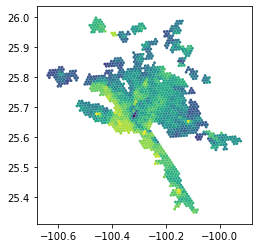

In [33]:
hex8_partimty.plot("parti_max")

## Upload to database

In [34]:
aup.gdf_to_db_slow(hex8_partimty,"participacion_mty_hexres8", 'governance', if_exists='replace')